In this project, I will be using a dataset from a chain of stores with the aim of building a model to predict Outlet Sales. I am provided with a dataset from BigMart, and my goal is to predict outlet sales based on items and stores. 

My target variable for this project is 'Item_Outlet_Sales'. Ultimately, I am aiming to predict the number of sales per outlet based on the sales dataset. 

In [132]:
# NumPy for numerical computing
import numpy as np

# Pandas for DataFrames
import pandas as pd
# Set display options for readibility 
pd.set_option('display.max_columns', 100)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Matplotlib for visualization
from matplotlib import pyplot as plt
# display plots in the notebook
%matplotlib inline 

# Seaborn for easier visualization
import seaborn as sns
sns.set_style('darkgrid')

# Import necessary libraries from sklearn lib. 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.exceptions import ConvergenceWarning
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

# Pickle for saving final model 
import pickle

# XGBoost library for xgboost plots 
import sys
!{sys.executable} -m pip install xgboost
from sklearn.datasets import load_boston

# Import warnings library to keep notebook clean 
import warnings
warnings.filterwarnings('ignore')

!pip install xgboost
import xgboost as xgb

DEPRECATION: Python 2.7 reached the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 is no longer maintained. pip 21.0 will drop support for Python 2.7 in January 2021. More details about Python 2 support in pip, can be found at https://pip.pypa.io/en/latest/development/release-process/#python-2-support
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/System/Library/Frameworks/Python.framework/Versions/2.7/Resources/Python.app/Contents/MacOS/Python -m pip install --upgrade pip' command.


In [133]:
# Load in training, testing, sample datasets 
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample = pd.read_csv('sample.csv')

## Exploratory Data Analysis 

In [134]:
train.shape
train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [135]:
# check dimensions of dataframes 
print(train.shape)
print(test.shape)

(8523, 12)
(5681, 11)


In [136]:
# review first 5 entries to ensure dataframe loaded successfully 
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016,Dairy,249.809,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138
1,DRC01,5.920,Regular,0.019,Soft Drinks,48.269,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.423
2,FDN15,17.500,Low Fat,0.017,Meat,141.618,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.270
3,FDX07,19.200,Regular,0.000,Fruits and Vegetables,182.095,OUT010,1998,NaN,Tier 3,Grocery Store,732.380
4,NCD19,8.930,Low Fat,0.000,Household,53.861,OUT013,1987,High,Tier 3,Supermarket Type1,994.705


In [137]:
# review first 5 entries to ensure dataframe loaded successfully 
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.008,Snack Foods,107.862,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038,Dairy,87.320,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.100,Others,241.754,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015,Snack Foods,155.034,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,nan,Regular,0.119,Dairy,234.230,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [138]:
# quick check of all features in df 
print(train.columns)
print(test.columns)

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')
Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')


In [139]:
# use describe function to get summary stats 
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000,8523.000,8523.000,8523.000,8523.000
mean,12.858,0.066,140.993,1997.832,2181.289
std,4.643,0.052,62.275,8.372,1706.500
min,4.555,0.000,31.290,1985.000,33.290
25%,8.774,0.027,93.826,1987.000,834.247
50%,12.600,0.054,143.013,1999.000,1794.331
75%,16.850,0.095,185.644,2004.000,3101.296
max,21.350,0.328,266.888,2009.000,13086.965


In [140]:
# use describe function to get summary stats 
test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000,5681.000,5681.000,5681.000
mean,12.696,0.066,141.023,1997.829
std,4.665,0.051,61.809,8.372
min,4.555,0.000,31.990,1985.000
25%,8.645,0.027,94.412,1987.000
50%,12.500,0.054,141.415,1999.000
75%,16.700,0.093,186.027,2004.000
max,21.350,0.324,266.588,2009.000


In [141]:
# combine training and testing sets to save effort in data cleaning 
#total_df=train
total_df = pd.concat([train, test], axis=0)
# check dimensions to ensure combination 
print(total_df.shape)

(14204, 12)


## Univariate Analysis

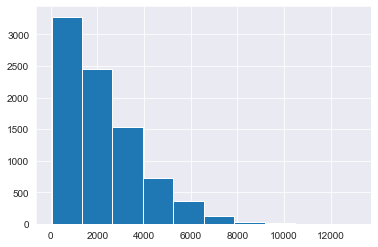

In [142]:
# hist of item outlet sales to preview distribution 
train.Item_Outlet_Sales.hist()
plt.show()

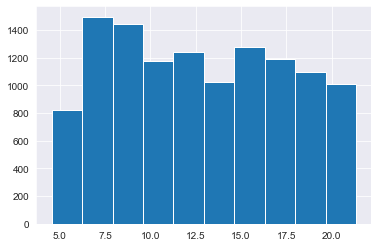

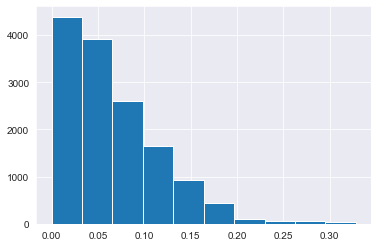

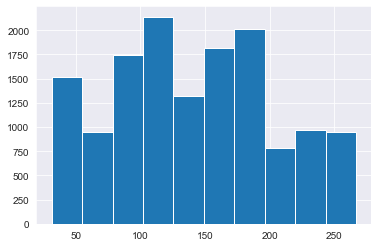

In [143]:
# plot histograms of weight, visibility, MRP to view distributions 
total_df.Item_Weight.hist()
plt.show()
total_df.Item_Visibility.hist()
plt.show()
total_df.Item_MRP.hist()
plt.show()

Some initial observations: there seems to be no clear cut pattern in Item Weight, there is a clear right-skewness to Item Visibility, and there are 4 different distrubtions present in Item MRP. 

Next, we'll start reviewing our categorical variables. First, let's plot Item_Fat_Content. 

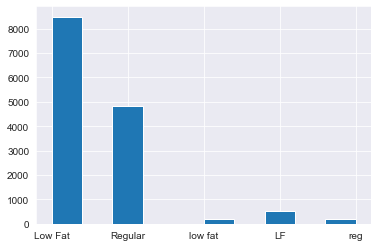

In [144]:
total_df.Item_Fat_Content.hist()

There are some repetitive categorical features here, so we can combine them. For example, Low fat, LF, and low fat are all the same category! 

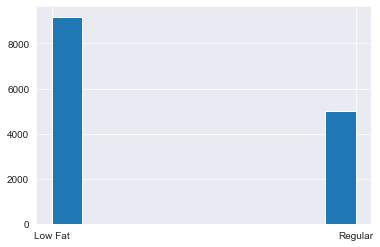

<Figure size 360x360 with 0 Axes>

In [145]:
# replace categorical features in groups 
total_df.Item_Fat_Content.replace(['LF', 'low fat'], 'Low Fat', 
                                  inplace=True)
total_df.Item_Fat_Content.replace('reg', 'Regular', inplace=True)

# graph new hist 
total_df.Item_Fat_Content.hist()
plt.figure(figsize=(5,5))
plt.show()

Now, let's check the other categorical variables.

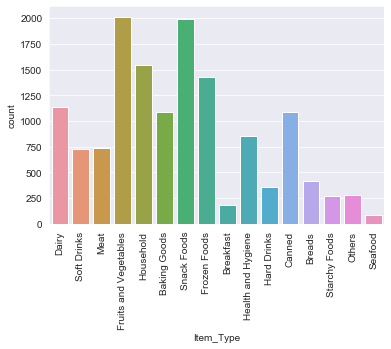

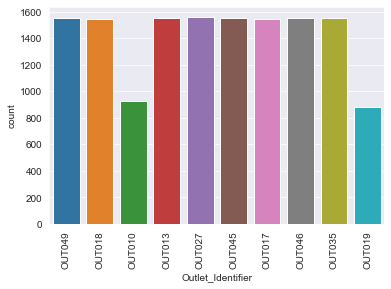

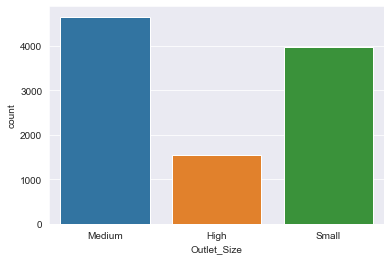

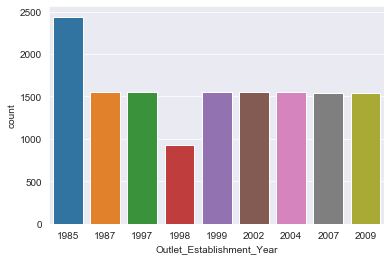

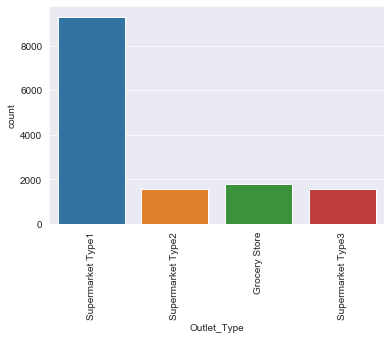

In [146]:
sns.countplot(total_df.Item_Type)
plt.xticks(rotation=90)
plt.show()

sns.countplot(total_df.Outlet_Identifier)
plt.xticks(rotation=90)
plt.show()

sns.countplot(total_df.Outlet_Size)
plt.show()

sns.countplot(total_df.Outlet_Establishment_Year)
plt.show()

sns.countplot(total_df.Outlet_Type)
plt.xticks(rotation=90)
plt.show()

Some additional observations: There aren't many observations in the year of 1998 and Supermarket Type 1 is clearly the most popular. 

## Bivariate Analysis

Now that I have explored features individually, I'll begin to look at features with respect to our target variables. The objective of bivariate analysis is to discover hidden relationships between independent variables and the target variable. 

In [147]:
# resplit df into train and test set 
train = total_df.iloc[1:8523]
test = total_df.iloc[8524:]

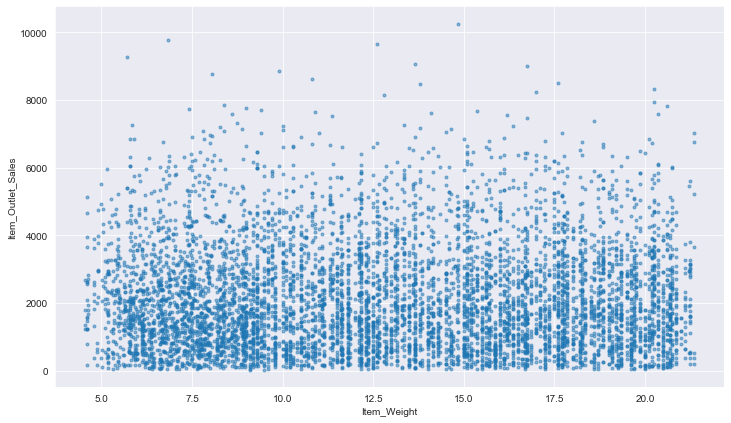

In [148]:
plt.figure(figsize=(12,7))
plt.xlabel("Item_Weight")
plt.ylabel("Item_Outlet_Sales")
plt.plot(train.Item_Weight, train["Item_Outlet_Sales"], '.', alpha=0.5)

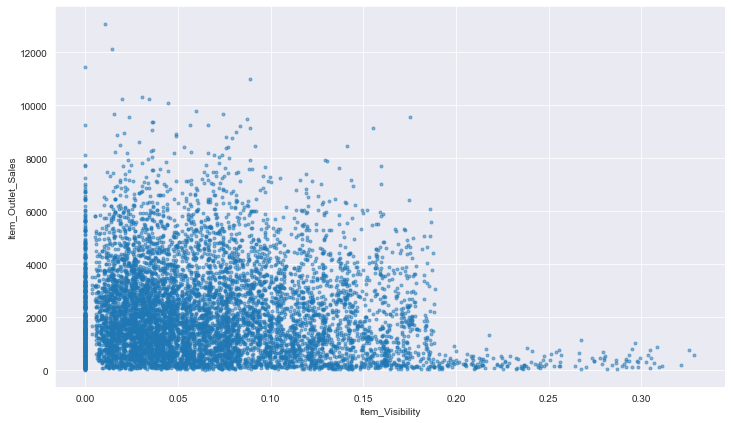

In [149]:
plt.figure(figsize=(12,7))
plt.xlabel("Item_Visibility")
plt.ylabel("Item_Outlet_Sales")
plt.plot(train.Item_Visibility, train["Item_Outlet_Sales"],'.', alpha = 0.5)

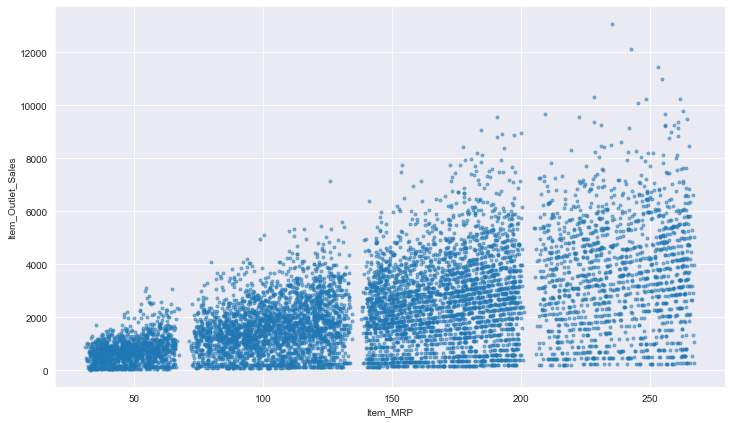

In [150]:
plt.figure(figsize=(12,7))
plt.xlabel("Item_MRP")
plt.ylabel("Item_Outlet_Sales")
plt.plot(train.Item_MRP, train["Item_Outlet_Sales"],'.', alpha = 0.5)

Observations: 
#### 1. Item_Outlet_Sales is spread well across the entire range of Item_Weight 
#### 2. Item_Visibility vs. Item_Outlet_Sales produces a stretch where Item_Visbility is 0, which is impossible. 
#### 3. Item_MRP vs. Item_Outlet_Sales produces 4 segments of prices that can be used in feature engineering.

Next, we will graph the target variable against our categorical variables. By doing so, I can check the distrubtion of my target variable across all categorical variables using a violinplot. 

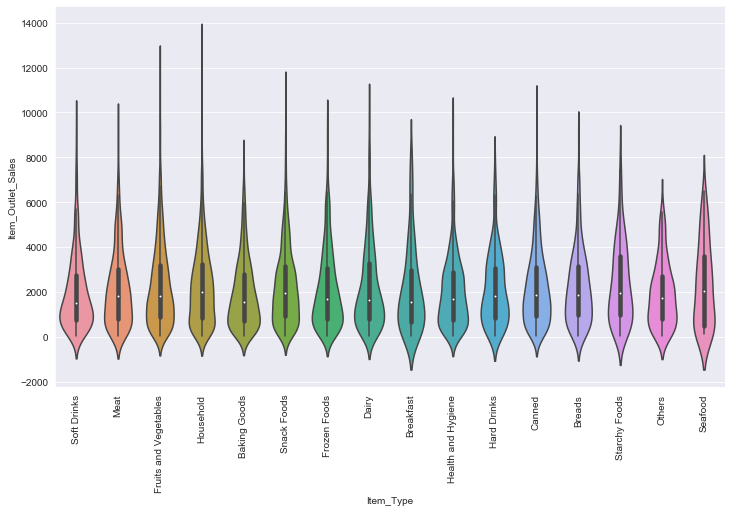

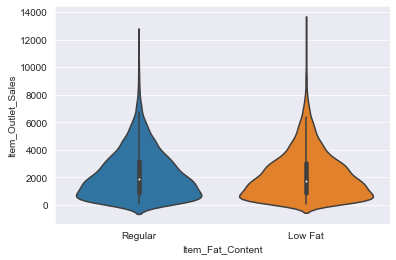

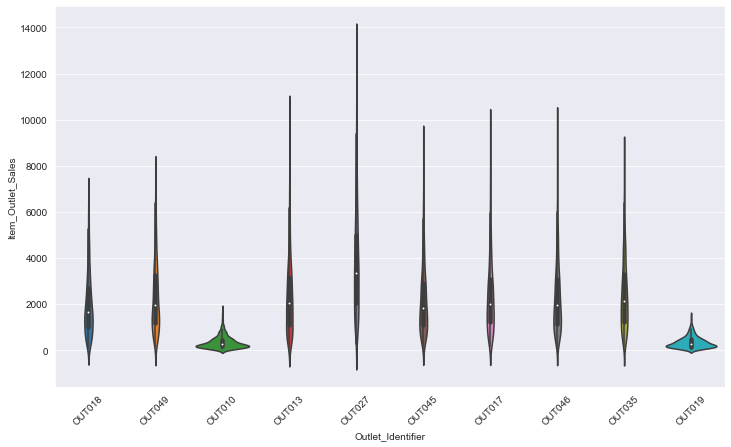

In [151]:
plt.figure(figsize=(12,7))
sns.violinplot(train.Item_Type, train.Item_Outlet_Sales)
plt.xticks(rotation=90)
plt.show()

sns.violinplot(train.Item_Fat_Content, train.Item_Outlet_Sales)
plt.show()

plt.figure(figsize=(12,7))
sns.violinplot(train.Outlet_Identifier, train.Item_Outlet_Sales)
plt.xticks(rotation=45)
plt.show()

Observations: 
#### 1. Distribution of Item_Outlet_Sales across Item_Type is not very distinct, which is the same pattern as Item_Outlet_Sales vs. Item_Fat_Content. 
#### 2. The distribution of OUT010 and OUT019 are similar and very unique from other Outlets. 

Next, we must address the missing values present in Outlet_Size. Although it does not show up on our graph, analysis of the dataset shows numerous missing values in Outlet_Size.

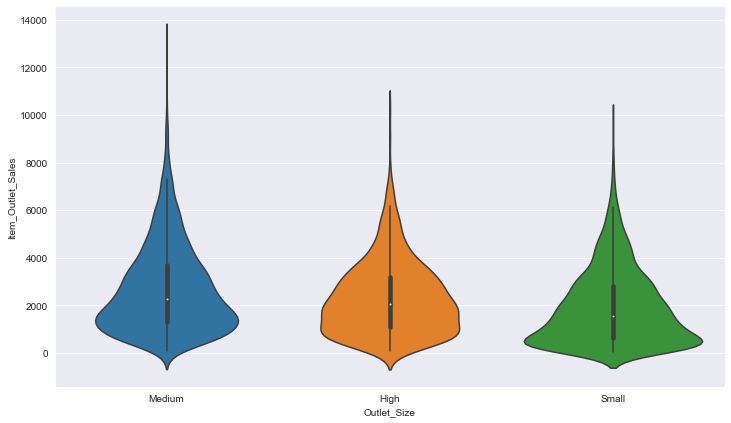

In [152]:
plt.figure(figsize=(12,7))
sns.violinplot(train.Outlet_Size, train.Item_Outlet_Sales)
plt.show()

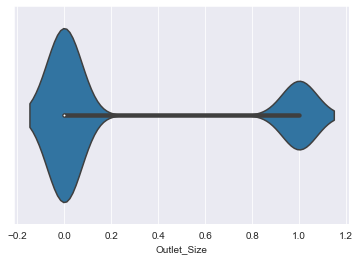

In [153]:
sns.violinplot(train['Outlet_Size'].isnull())

Clearly, there is a small distribution of outlets that do not have a size variable. Since they are 'Missing', we will fill them in with the Small Outlet Size for the time being, as their distributions are fairly similar. 

In [154]:
total_df['Outlet_Size'].fillna('Small', inplace=True)
total_df['Outlet_Size'].isnull().sum()

0

With that fixed, we can go on to further examining other variables and their effects on our target. 

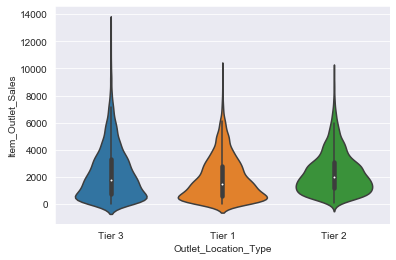

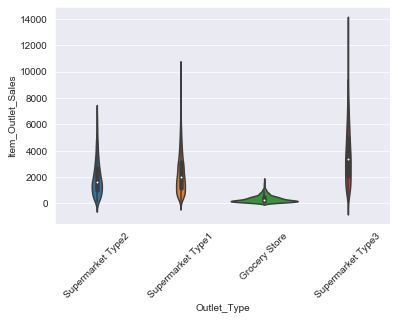

In [155]:
sns.violinplot(train.Outlet_Location_Type, train.Item_Outlet_Sales)
plt.show()

sns.violinplot(train.Outlet_Type, train.Item_Outlet_Sales)
plt.xticks(rotation=45)
plt.show()

Observations: 
#### 1. Tier 1 and Tier 3 have very similar distributions. 
#### 2. In the Outlet_Type violinplot, the Grocery Stores have more points at lower sales numbers than any other type. 

## Missing Value Treatment

In [156]:
# Display number of missing values by feature (categorical)
total_df.select_dtypes(include=['object']).isnull().sum()
# Display number of missing values by feature (numeric)
total_df.select_dtypes(exclude=['object']).isnull().sum()

Item_Weight                  2439
Item_Visibility                 0
Item_MRP                        0
Outlet_Establishment_Year       0
Item_Outlet_Sales            5681
dtype: int64

As we can see, we have numerous missing values in Item_Weight and Item_Outlet_Sales. In this section, I will go about adjusting this missing data. Note: Missing data in Item_Outlet_Sales can be ignored as they belong to the test dataset. 

To fix the missing values in Item_Weight, I will impute the mean of weights based on the Item_Identifier. 

In [157]:
item_weight_avg = total_df.pivot_table(values='Item_Weight', index='Item_Identifier')
print(item_weight_avg)

                 Item_Weight
Item_Identifier             
DRA12                 11.600
DRA24                 19.350
DRA59                  8.270
DRB01                  7.390
DRB13                  6.115
...                      ...
NCZ30                  6.590
NCZ41                 19.850
NCZ42                 10.500
NCZ53                  9.600
NCZ54                 14.650

[1559 rows x 1 columns]


Now that each items mean weight has been found, we can fill in missing weight values with the average weight of the respective item. This is done using my custom helper function, fill_item_weight. 

In [158]:
# function def to fill in missing weight 
def fill_item_weight(columns): 
    total_weight = columns[0]
    ID = columns[1]
    if pd.isnull(total_weight): 
        return item_weight_avg['Item_Weight'][item_weight_avg.index==ID]
    else: 
        return total_weight 

# apply function to df 
total_df['Item_Weight'] = total_df[['Item_Weight', 'Item_Identifier']].apply(fill_item_weight, axis=1).astype(float)

# check for missing vals (should be 0)
print(total_df['Item_Weight'].isnull().sum())
# Display number of missing values by feature (numeric)
total_df.select_dtypes(exclude=['object']).isnull().sum()

0


Item_Weight                     0
Item_Visibility                 0
Item_MRP                        0
Outlet_Establishment_Year       0
Item_Outlet_Sales            5681
dtype: int64

Next, I will go about adjusting my Item_Visibility observations. In the EDA portion, I saw that a lot of products had a Item_Visibility of 0, which is impossible as all products must be visible to customers. So, to fix this issue, I will use a similar tactic as above and impute the item's visibility mean based on its identifier. 

In [159]:
# calculate mean weight of each item ID 
item_vis_avg = total_df.pivot_table(values='Item_Visibility', index='Item_Identifier')
print(item_vis_avg)

                 Item_Visibility
Item_Identifier                 
DRA12                      0.035
DRA24                      0.046
DRA59                      0.133
DRB01                      0.080
DRB13                      0.007
...                          ...
NCZ30                      0.027
NCZ41                      0.056
NCZ42                      0.011
NCZ53                      0.026
NCZ54                      0.081

[1559 rows x 1 columns]


In [160]:
# function to fill missing visibility with mean based on item ID 
def fill_item_vis(columns): 
    vis = columns[0]
    item = columns[1]
    if vis == 0: 
        return item_vis_avg['Item_Visibility'][item_vis_avg.index==item]
    else: 
        return vis 

# apply function to df 
total_df['Item_Visibility'] = total_df[['Item_Visibility', 'Item_Identifier']].apply(fill_item_vis,axis=1).astype(float)

# check for missing vals 
print(sum(total_df['Item_Visibility'] == 0))

0


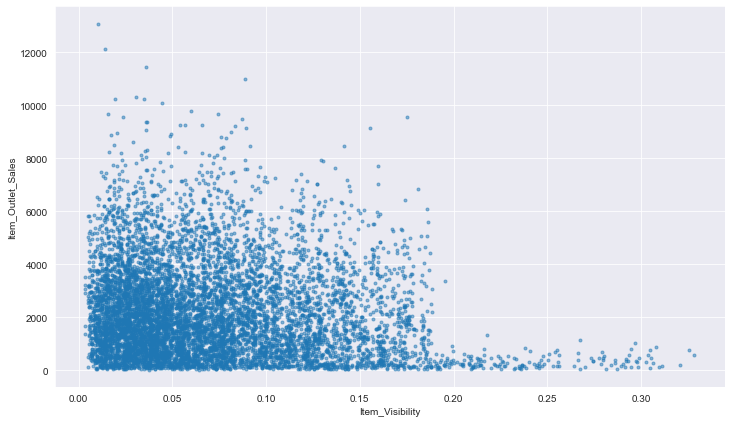

In [161]:
plt.figure(figsize=(12,7))
plt.xlabel("Item_Visibility")
plt.ylabel("Item_Outlet_Sales")
plt.plot(total_df.Item_Visibility, total_df["Item_Outlet_Sales"],'.', alpha = 0.5)

As we can see, the features that had a value of 0 are no longer present. In addition, we can clearly see a few more observations towards the right than the graph produced in the EDA. Now that my missing values have been fixed, I can move onto feature engineering! 

## Feature Engineering

Now that my dataset is clean and no longer has missing values, I am ready to begin working on the dataset and making adjustments. This portion, called feature engineering, allows me to create more features (variables/columns). This allows for more comparisons amongst variables, further enhancing the model I will build based on this dataset. 

I plan on creating five new features, listed below: 
#### 1. Item_Type_New: Broader categories for Item_Type 
#### 2. Item_Category: Categorical variable based on Item_Identifer 
#### 3. Outlet_Years: Years of operation for outlets. 
#### 4. Item_MRP_Clusters: Binned feature based on Item_MRP 
#### 5. price_per_unit_wt: Item_MRP/Item_Weight 

First, I will create the feature 'Item_Type_New'. This creates new categories for item types, broken down into perishable, non-perishable, and not sure. 

In [162]:
# create arrays to identify which type the item is 
perishable = ["Breads", "Breakfast", "Dairy", "Fruits and Vegetables", "Meat", "Seafood"]
non_perishable = ["Baking Goods", "Canned", "Frozen Foods", "Hard Drinks", "Health and Hygiene", "Household", "Soft Drinks"]

# create new feature in array and apply label bsaed on item type 
total_df['Item_Type_New'] = ["perishable" if i in perishable 
                             else "non_perishable" if i in non_perishable
                             else "not_sure" for i in total_df.Item_Type]
# drop old column 
total_df = total_df.drop('Item_Type', axis=1)

print(total_df['Item_Type_New'])

0           perishable
1       non_perishable
2           perishable
3           perishable
4       non_perishable
             ...      
5676          not_sure
5677          not_sure
5678    non_perishable
5679    non_perishable
5680    non_perishable
Name: Item_Type_New, Length: 14204, dtype: object


In addition, we can create the feature Item_Category by labeling the items as 'DR' (drink), 'FD' (food), or 'NC' (non-consumable). 

In [163]:
# Save the first 2 chars of the item ID 
total_df['Item_Category'] = total_df['Item_Identifier'].apply(lambda x: x[0:2])

# Create new feature and store observations 
total_df['Item_Category'] = total_df['Item_Category'].map({'FD':'Food', 
                                                        'NC':'Non-Consumable', 
                                                        'DR':'Drinks'})
# drop old column 
total_df = total_df.drop('Item_Identifier', axis=1)

# check # of vals in each category 
total_df['Item_Category'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Category, dtype: int64

Next, I will make a quick adjustment to the Item Fat Content column. Since non-consumable items cannot have a fat content, I will fill those observations with the value of "Non-Edible". 

In [164]:
total_df.loc[total_df['Item_Category']=="Non-Consumable",'Item_Fat_Content'] = "Non-Edible"
total_df['Item_Fat_Content'].value_counts()

Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64

Furthermore, I will create a new feature named Outlet_Years, keeping track of how long each store has been in business. 

In [165]:
total_df['Outlet_Years'] = 2013 - total_df['Outlet_Establishment_Year']
total_df['Outlet_Years'].describe()

count   14204.000
mean       15.169
std         8.372
min         4.000
25%         9.000
50%        14.000
75%        26.000
max        28.000
Name: Outlet_Years, dtype: float64

Next, I'll create the price_per_unit_wt feature. 

In [166]:
total_df['price_per_unit_wt'] = total_df['Item_MRP']/total_df['Item_Weight']
total_df['price_per_unit_wt'].describe()

count   14204.000
mean       12.801
std         8.068
min         1.665
25%         6.830
50%        10.983
75%        16.342
max        50.776
Name: price_per_unit_wt, dtype: float64

Finally, I will create my last feature in MRP Clusters. This gives me an estimation of each item's MRP without needed the exact value. 

In [167]:
total_df['Item_MRP_Clusters'] = ["1st" if i < 69 
                                 else "2nd" if i >= 69 and i < 136
                                 else "3rd" if i >= 136 and i < 203
                                 else "4th" for i in total_df.Item_MRP]
print(total_df['Item_MRP_Clusters'])

0       4th
1       1st
2       3rd
3       3rd
4       1st
       ... 
5676    3rd
5677    3rd
5678    2nd
5679    4th
5680    2nd
Name: Item_MRP_Clusters, Length: 14204, dtype: object


## Encoding Categorical Variables

First, I will label encode Outlet_Size and Outlet_Location_Type. Label encoding is turning categorical variables into numerical values. 

In [168]:
# overwrite outlet size observations with numerical values 
total_df['Outlet_Size'] = ["0" if i == "Small"
                           else "1" if i == "Medium"
                           else "2" for i in total_df.Outlet_Size]

# overwrite outlet location type observations with numerical values 
total_df['Outlet_Location_Type'] = ["0" if i == "Tier 3"
                                    else "1" if i == "Tier 2"
                                    else "2" for i in total_df.Outlet_Location_Type]

For the final portion of encoding categorical variables, I will one hot encode the categorical variables. This is done by creating 3 new variables for each category, filled with observations of 0/1 binary values. These values indicate whether an observation was recorded or not. This can be done with the dummies function in the Pandas library. 

In [169]:
total_df = pd.get_dummies(data=total_df, columns = ['Item_Fat_Content', 
                                                    'Outlet_Location_Type', 
                                                    'Outlet_Size', 
                                                    'Outlet_Type', 
                                                    'Item_Type_New', 
                                                    'Item_Category', 
                                                    'Item_MRP_Clusters', 
                                                    'Outlet_Identifier'])
# check type of new variables 
total_df.dtypes

Item_Weight                      float64
Item_Visibility                  float64
Item_MRP                         float64
Outlet_Establishment_Year          int64
Item_Outlet_Sales                float64
Outlet_Years                       int64
price_per_unit_wt                float64
Item_Fat_Content_Low Fat           uint8
Item_Fat_Content_Non-Edible        uint8
Item_Fat_Content_Regular           uint8
Outlet_Location_Type_0             uint8
Outlet_Location_Type_1             uint8
Outlet_Location_Type_2             uint8
Outlet_Size_0                      uint8
Outlet_Size_1                      uint8
Outlet_Size_2                      uint8
Outlet_Type_Grocery Store          uint8
Outlet_Type_Supermarket Type1      uint8
Outlet_Type_Supermarket Type2      uint8
Outlet_Type_Supermarket Type3      uint8
Item_Type_New_non_perishable       uint8
Item_Type_New_not_sure             uint8
Item_Type_New_perishable           uint8
Item_Category_Drinks               uint8
Item_Category_Fo

Finally, after encoding the categorical variables and making them numerical values, I can now remove the categorical features in the dataframe. 

## Preprocessing Data

Now that my data is clean and I have created and edited my custom features, I can begin processing my data before feeding it to my model. This step includes dealing with data skewness and the scale of our numerical variables. 

First, I will remove skewness from my dataset. This is because skewness is undesirable for predictive modeling, as normally distributed data is better for machine learning algorithms. To remove the skew, I will define a function to normalize the data. 

In [170]:
def normalize(column): 
    up = column.max()
    low = column.min()
    total = (column - low)/(up - low)
    return total

# normalize data using function 
final_normalized = normalize(total_df.Item_Visibility)
final_normalized.describe()

count   14204.000
mean        0.204
std         0.153
min         0.000
25%         0.085
50%         0.165
75%         0.287
max         1.000
Name: Item_Visibility, dtype: float64

Much better! The standard deviation from mean is far lower than before. 

The next method of preprocessing my data is scaling the numeric predictors. This means centering these numeric values around a mean of 0, with a standard deviation on a scale from 0 to 1. This scaling is necessary for my linear regression models. 

In [171]:
float_array = total_df['Item_Outlet_Sales'].values.astype(float)
min_max_scaler = preprocessing.MinMaxScaler()
scaled_array = min_max_scaler.fit_transform(float_array.reshape(-1, 1))
total_df['Item_Outlet_Sales'] = scaled_array
total_df['Item_Outlet_Sales']

0      0.284
1      0.031
2      0.158
3      0.054
4      0.074
        ... 
5676     nan
5677     nan
5678     nan
5679     nan
5680     nan
Name: Item_Outlet_Sales, Length: 14204, dtype: float64

Before moving on, I want to get a better understanding of the relationships between variables in my dataset. To do so, I will build a correlation heat map, allowing me to see how strong the relationship is between all variables. 

In [172]:
total_df.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Years,price_per_unit_wt,Item_Fat_Content_Low Fat,Item_Fat_Content_Non-Edible,Item_Fat_Content_Regular,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_New_non_perishable,Item_Type_New_not_sure,Item_Type_New_perishable,Item_Category_Drinks,Item_Category_Food,Item_Category_Non-Consumable,Item_MRP_Clusters_1st,Item_MRP_Clusters_2nd,Item_MRP_Clusters_3rd,Item_MRP_Clusters_4th,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049
0,9.300,0.016,249.809,1999,0.284,14,26.861,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,5.920,0.019,48.269,2009,0.031,4,8.154,0,0,1,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
2,17.500,0.017,141.618,1999,0.158,14,8.092,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
3,19.200,0.018,182.095,1998,0.054,15,9.484,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
4,8.930,0.010,53.861,1987,0.074,26,6.032,0,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0


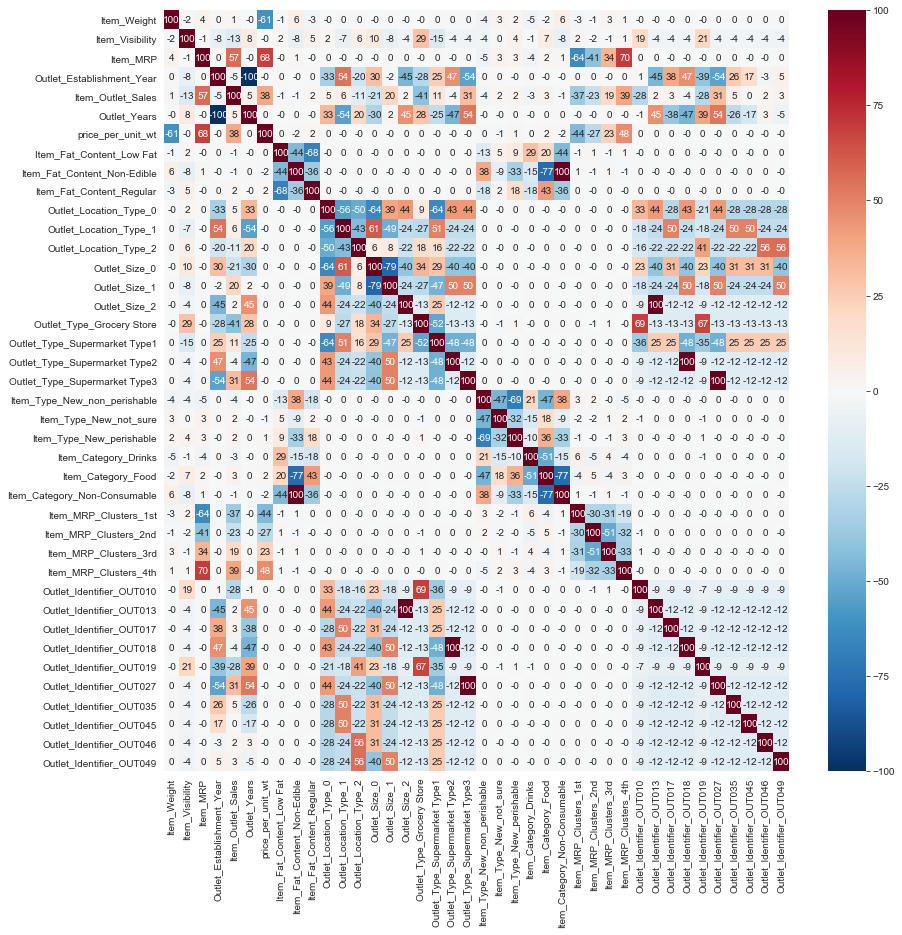

In [174]:
#create the correlations object 
correlations = total_df.corr()
# Make the figsize 10 x 8
plt.figure(figsize=(14,14))
# Plot heatmap of annotated correlations
sns.heatmap(correlations * 100, 
            fmt='.0f', 
            annot = True, 
            cmap = 'RdBu_r')
plt.show()

## Model Building

Finally, we are at the most interesting step of the process! I will now get into building my predictive model. I will begin with modeling my dataset using linear models, then move on to more complex models such as RandomForest and XGBoost. 

First, I will have to split my complete dataset into training and test sets, which will be used for different purposes in the model building phase. I will use training sets to help fit the model, then use the test sets to evaluate each models' performance. 


### separating original test and train


In [175]:
train = total_df[:8522]
test = total_df[8523:]

# split x and y into train,test sets 
x = train.drop('Item_Outlet_Sales',axis=1)
y = train.Item_Outlet_Sales

#x_train, y_train = train_test_split(x, y, test_size=0.39, random_state=123)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=123)
print(len(x_train), len(y_train), len(y_test), len(x_test))

6817 6817 1705 1705


After the training and test sets have been created, I can get into fitting my models! First up is Linear Regression. 

In [176]:
from math import sqrt

# create linear regression object 
lm = LinearRegression()

# fit LR model with datasets  
lm.fit(x_train, y_train)

# predict values using Linear Regression model 
pred = lm.predict(x_test)

# print model performance stats 
print('R^2', r2_score(y_test, pred))
print('MAE:', mean_absolute_error(y_test, pred))
print('RMSE:', sqrt(mean_squared_error(y_test, pred)))

R^2 0.5578293606230968
MAE: 0.06540050972636002
RMSE: 0.08845216224609541


Unfortunately, Linear Regression isn't the best at modeling and predicting values, as the predicted values show us. Going forward, I will create pipeline and hyperparameter dictionaries to assist with building and fitting the four other models. 

In [182]:
# create pipelines dictionary, creates and stores each model 
pipelines = { 
    'lasso' : make_pipeline(StandardScaler(), Lasso(random_state=123)),
    'ridge' : make_pipeline(StandardScaler(), Ridge(random_state=123)),
    'rf' : make_pipeline(StandardScaler(), RandomForestRegressor(random_state=123)),
    'gb' : make_pipeline(StandardScaler(), GradientBoostingRegressor(random_state=123))    
}

# declare hyperparameters for models, change model fit 
lasso_hyperparameters = { 
    'lasso__alpha' : [0.0001, 0.001, 0.01, 0.1, 1, 5, 10] 
}

# Ridge hyperparameters
ridge_hyperparameters = { 
    'ridge__alpha': [0.0001, 0.001, 0.01, 0.1, 1, 5, 10]  
}

# Random forest hyperparameters
rf_hyperparameters = { 
    'randomforestregressor__n_estimators' : [100, 200],
    'randomforestregressor__max_features': ['auto', 'sqrt', 0.33],
}

# Boosted tree hyperparameters
gb_hyperparameters = { 
    'gradientboostingregressor__n_estimators': [100, 200],
    'gradientboostingregressor__learning_rate' : [0.05, 0.1, 0.2],
    'gradientboostingregressor__max_depth': [1, 3, 5]
}

# Create complete hyperparameters dictionary
hyperparameters = {
    'rf' : rf_hyperparameters,
    'gb' : gb_hyperparameters,
    'lasso' : lasso_hyperparameters,
    'ridge' : ridge_hyperparameters
}

With pipelines and hyperparameters declared, I can now get into fitting these models. The pipelines store the actual model object, while the hyperparameters tune the model for smaller changes. We will test each hyperparameter using a GridSearchCV object, storing the best models in the fitted_models dictionary.

In [183]:
# create fitted models dictionary 
fitted_models = {}

for name, pipeline in pipelines.items(): 
    model = GridSearchCV(pipeline, hyperparameters[name], cv=10, n_jobs=-1)
    
    # fit model 
    model.fit(x_train, y_train)
    
    # store models 
    fitted_models[name] = model
    
    # print success msg 
    print(name, 'has been fitted')

lasso has been fitted
ridge has been fitted
rf has been fitted
gb has been fitted


Now that my model has been fitted, I can begin evaluating model performance. The first way to compare model performance is through the .best_score_ function. In addition, I will display the R^2 and MAE values for each model for further comparison.

In [184]:
# display model best score from each of saved models 
for name, model in fitted_models.items(): 
    print(name, model.best_score_)

print('-----')
print('-----')
# display model stats (R^2 and MAE)
for name, model in fitted_models.items(): 
    pred = model.predict(x_test)
    print(name)
    print('-----')
    print('R^2', r2_score(y_test, pred))
    print('MAE:', mean_absolute_error(y_test, pred))
    print('RMSE:', sqrt(mean_squared_error(y_test, pred)))

lasso 0.5613560172462246
ridge 0.5609925807531141
rf 0.5710563055575779
gb 0.5983620169630263
-----
-----
lasso
-----
R^2 0.5582006448774298
MAE: 0.06520623484738035
RMSE: 0.08841501845014893
ridge
-----
R^2 0.5577150698244908
MAE: 0.06538558973897249
RMSE: 0.08846359291809533
rf
-----
R^2 0.5568496301283934
MAE: 0.06193523485847589
RMSE: 0.08855010105375266
gb
-----
R^2 0.5946585016455372
MAE: 0.05886124054458519
RMSE: 0.08468842134213632


Finally, the last step! After creating and fitting each of the five models, it is clear by the evaluation metrics that the Random Forest Regressor model is best at modeling Item Outlet Sales. Now, I can graph the model's performance and predicted values against the actual, expected values! Let's see how I did! 

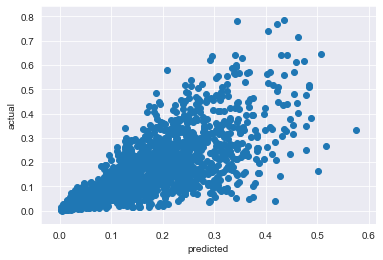

In [185]:
# display best model performance 
rf_pred = fitted_models['rf'].predict(x_test)
plt.scatter(rf_pred, y_test)
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()

Nice!!! The model turned out fairly accurate! After the entire machine learning project, I have learned that given a large dataset of sales information, the Random Forest Regressor model is best at predicting the ultimate amount of Item Sales per Outlet. 